<a href="https://colab.research.google.com/github/timjohnsonr8/treemon/blob/main/treemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

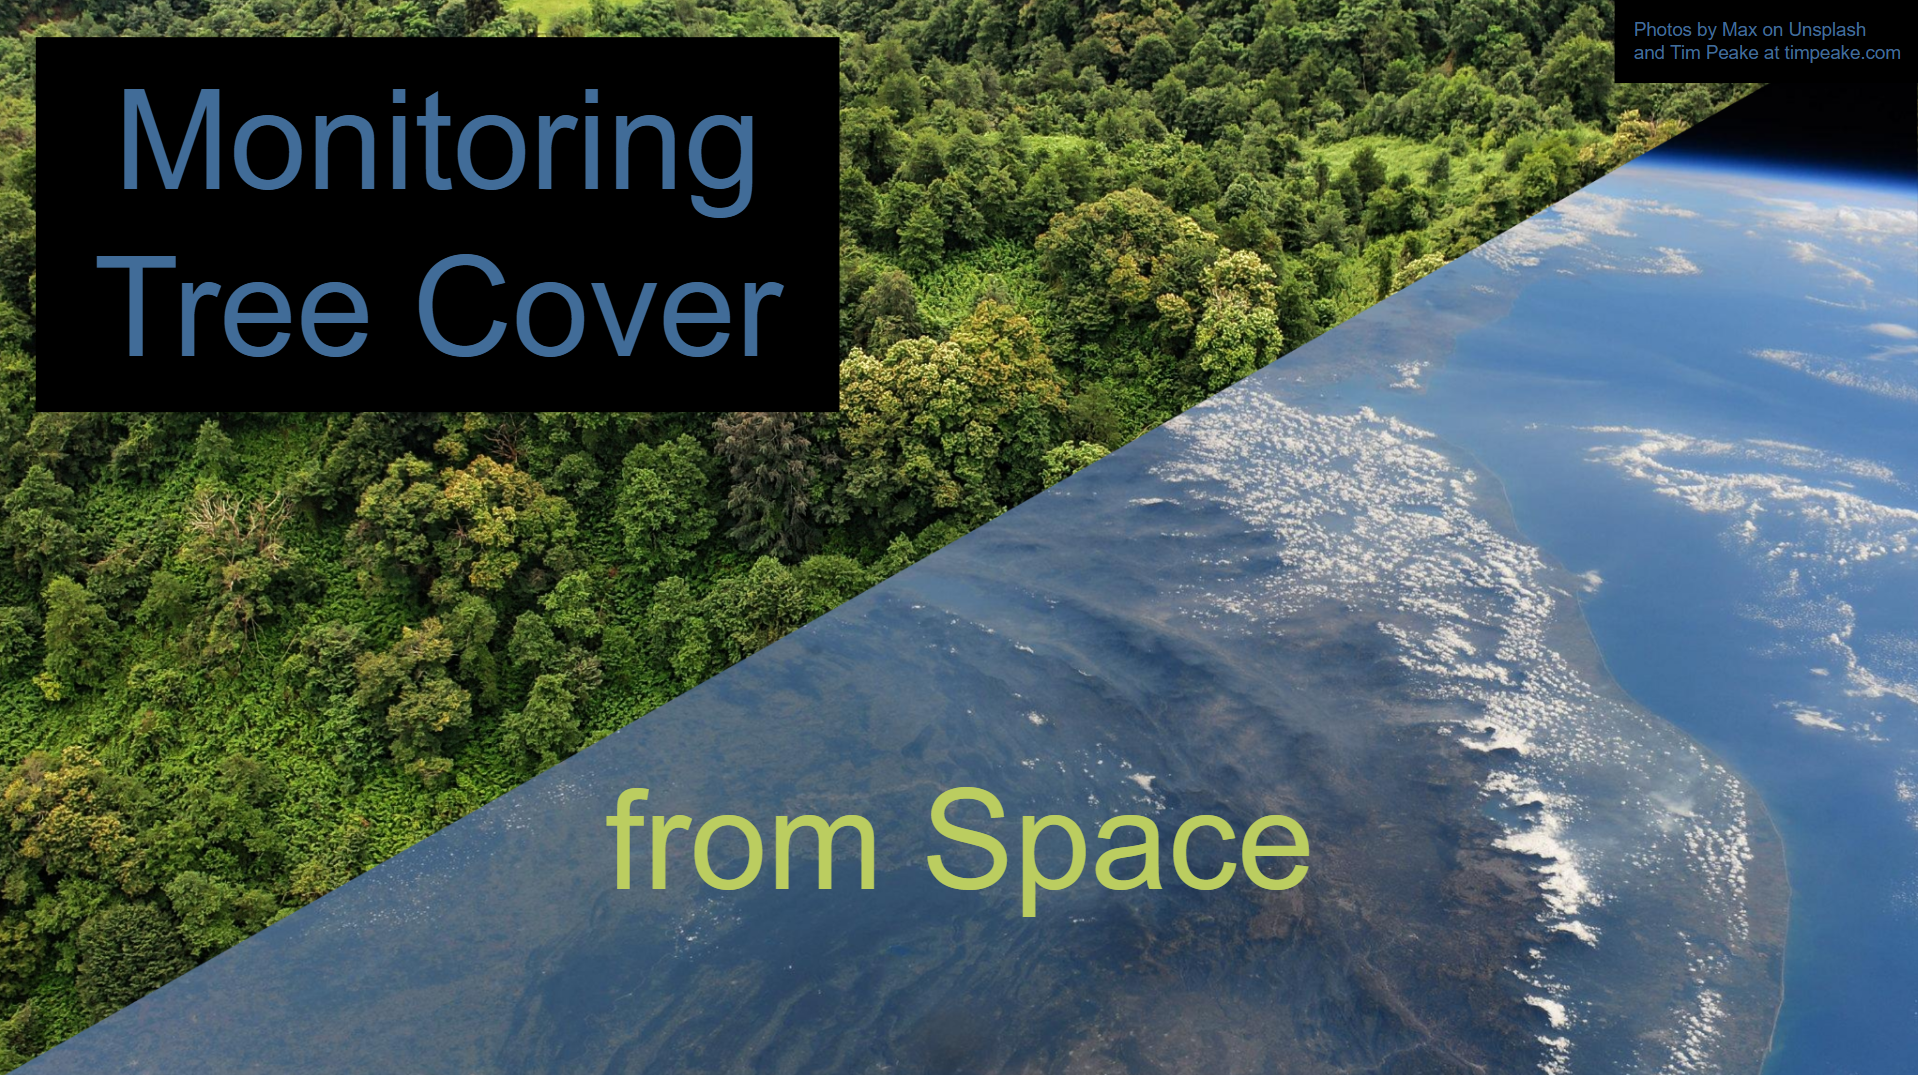

# Introduction

The aim of this project is:

> To allow someone to determine how tree coverage has changed over the last ten years:
> - for their local area
> - without requiring specialist knowledge
> - as a motivator for increasing the amount of tree cover

It is intended that this is achieved via the software code on this single page, without the need for separately downloading data and analysing it using complex tools.  The amount of user input is kept to a minimum, which is:

* The years to compare between
* The area of interest

# Credits



As someone without a background in Earth Observation it was Andrew Cutt's [The Scene From Above Podcast](https://www.acgeospatial.co.uk/podcasts/) that first got me thinking that it might be something I could dabble with.

I then found and read Rebekah Esmaili's [Earth Observation using Python: A Practical Programming Guide](https://www.rebekahesmaili.com/).  I was particularly interested in the ability to highlight vegetation.

At this point I was ready to try using Python to view satellite data of my local area.  In looking at options I came across the [Copernicus Data Space Ecosystem](https://dataspace.copernicus.eu/).  I found the [JupyterLab service](https://dataspace.copernicus.eu/analyse/jupyterlab) a great way to get started, with example Python notebooks that I could modify for my own purposes.

This notebook then builds upon these foundations.


# Results so far

I've found it very difficult to differentiate trees from other vegetation, but I feel I'm getting somewhere.  The image below is the result for [Wood End Thrift](https://www.marstonvale.org/wood-end-thrift), near Marston Moretaine in Bedfordshire.  An area of fields was planted with trees in 2015 and it looks like I'm detecting the change.

The results are displayed as an overlay on top of Google Maps.  The data I'm using is 10m per pixel.  Higher resolution imagery is available, but at a cost.  The Google Maps "satellite" imagery is a mixture of aerial photography and satellite data for less populated areas.


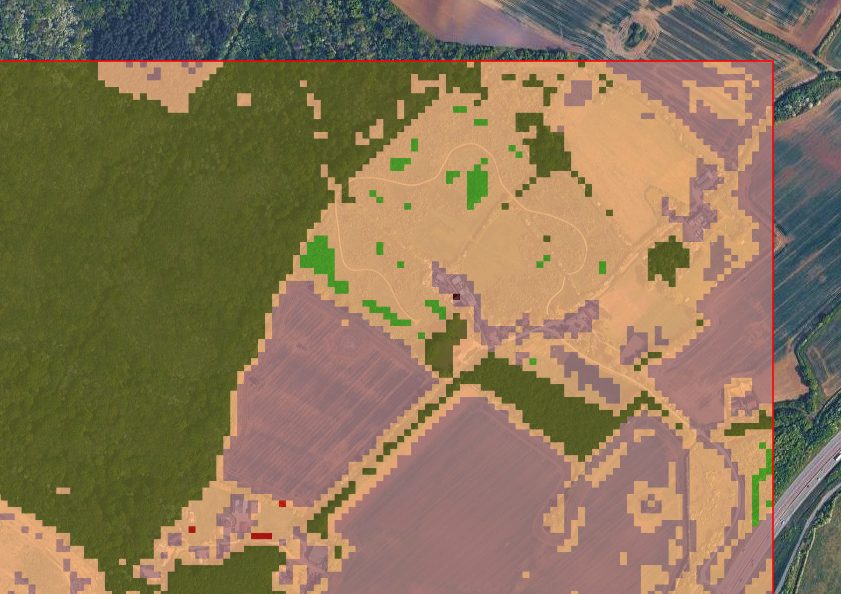


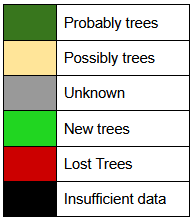

# Help needed

##Technical
Although the result above is encouraging, the accuracy of the results vary considerably depending on the years and areas that are selected.  The difference between trees and non-trees is often not detected.  I have looked at other previous work, but haven't found anything that does what I'd like.  So any technical help would be greatly appreciated.

##Non-technical
I've also found it hard to find good test sites / case studies to experiment with.  Ideally the area of trees needs to be at least 100m x 100m and planted around 2015 so that they have had enough time to grow.  It would also be good to have an example of where trees have been cleared.

Plus any other feedback would be gratefully received.


# Running

First of all click this [open in Colab](https://colab.research.google.com/github/timjohnsonr8/treemon/blob/main/treemon.ipynb) link so that there is an operating environment in which to run this code (Google account needed). Then modify the parameters and register for the required services (see below).

Once you've done this then click "Run all":

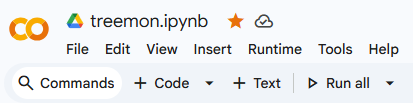

I've chosen to use Colab at the moment, rather than CDSE's JupyterLab service, in order to make use of the Gemini AI assistance when writing the code.

# Parameters
The things to choose are the years to compare between and the coordinates for a specific area on the ground.

The earliest full year of data is 2016, we need full years of data for the analysis.

The coordinates for the area on the ground can be determined via the [bboxfinder](http://bboxfinder.com/) website.  Draw a rectangle around the area of interest - the coordinates will then be shown in the URL.  The bounding box is specified as the longitude and latitude coordinates of lower left and upper right corners.  The lat long numbers need to be switched round when copying from the URL.

For example the URL:
```
http://bboxfinder.com/#52.059246,-0.589528,52.067346,-0.568328
```
becomes the variable:
```
AREA_OF_INTEREST = [-0.589528,52.059246,-0.568328,52.067346]
```
Update the three lines below with your choices.

In [1]:
YEAR_BASELINE = 2016 # Earliest full year is 2016
YEAR_COMPARISON = 2024 # Need a full year of data
AREA_OF_INTEREST = [-0.589528,52.059246,-0.568328,52.067346] # Wood End Thrift, near Marston Moretaine (2016 to 2024 is best)

# Registering for services

Access to the following services is needed:

*   Sentinel Hub
*   Google Maps Interface

### Sentinel Hub

Sentinel Hub is part of the Copernicus Data Space Ecosystem and allows direct access to satellite data.  You'll need to register for an account [here](https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/auth?scope=openid+email+profile&response_type=code&client_id=sh-a696e3be-b074-4baa-9e76-b10bee279c85&redirect_uri=https%3A%2F%2Fshapps.dataspace.copernicus.eu%2Fdashboard%2F&code_challenge=f_Lw60gq5CYf2l-b41HGRxMXtXxhppyYK-V66AsM9EA&code_challenge_method=S256&nonce=o0bWGdzpplRTEwV4aYj50f_wdfLXuy08le-ESZRaKrI&state=_cL-Ts9QOsxHWNZhT8xuoQ4uM1MAOxzR6YzMFYBYUvI&response_mode=query).  Note that you don't need to click on the tick box for the Copernicus Contributing Missions data.

Credentials for Sentinel Hub services can be obtained in your [Dashboard](https://shapps.dataspace.copernicus.eu/dashboard/#/). In the User Settings create a new OAuth Client to generate these credentials. You don't need to click "*Client will be used by a single-page application*".  For more detailed instructions, visit the relevant [documentation page](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Overview/Authentication.html).

Once you have your credentials then create secrets in Colab (via the key icon in the left-hand pane of Colab) with the names `sentinel_hub_id` & `sentinel_hub_secret`.

### Google Maps Interface

Follow the steps in [Set up the Maps JavaScript API](https://developers.google.com/maps/documentation/javascript/get-api-key), beginning by clicking on "Get Started".  You'll be asked whether you want to join the "Google Developer Program" - not currently sure whether this is needed.  You don't actually need to enter the billing information, but without this “For development purposes only” will be displayed in the Google Maps window.  The service is free for low-volume use, but a credit card is needed to set up.  Once the Maps Javascript API has been enabled and you have the API key, create a secret in Colab called `google_maps_key`.  The API key should be configured with a restriction such that it can only be used with Maps APIs.

# Run the code

At this point we should be ready to run the software, click "Run all" in Colab:

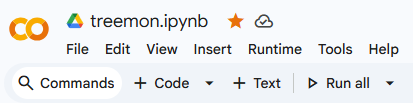


Once the software has finished running the image showing how it thinks tree cover has changed between the selected years, for the selected area, will be shown near the bottom of the page.

There is no need to read the rest of the page unless you're interested in how it works.

# Load keys from Colab into variables

In [2]:
from google.colab import userdata
SENTINEL_HUB_ID = userdata.get('sentinel_hub_id')
SENTINEL_HUB_SECRET = userdata.get('sentinel_hub_secret')
GOOGLE_MAPS_KEY = userdata.get('google_maps_key')

# Tuning parameters
These can be left as they are.  They can be tweaked to change the behaviour of the software.

In [3]:
# Tuning parameters
AUG_MAX_THRESHOLD = 0.7
AUG_MAX_VARIABILITY = 0.1
WINTER_MAX_THRESHOLD = 0.8
WINTER_MAX_VARIABILITY = 0.05
WINTER_MIN = 0.4
DEBUGGING = False # If set to True then just processes a single line of pixels and provides more output
COLOUR_PROBABLE = (56,118,29)
COLOUR_POSSIBLE = (255,229,153)
COLOUR_UNLIKELY = (153,153,153)
COLOUR_NEW = (33,214,33)
COLOUR_LOST = (190,4,0)
COLOUR_INSUFFICIENT_DATA = (0,0,0)

# Imports
Functions loaded from pre-existing libraries.

In [4]:
# Imports
from typing import Any, Optional, Tuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj import Geod
import base64
from PIL import Image
from datetime import date, datetime
from IPython.display import HTML, display

In [5]:
pip install sentinelhub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.6/165.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.3 MB/s eta 0:00:00


In [6]:
from sentinelhub import (
    SHConfig,
    DataCollection,
    SentinelHubCatalog,
    SentinelHubRequest,
    BBox,
    bbox_to_dimensions,
    CRS,
    MimeType,
)

# Sentinel Hub Authentication

In [7]:
config = SHConfig()
config.get_config_location()
config.sh_client_id = SENTINEL_HUB_ID
config.sh_client_secret = SENTINEL_HUB_SECRET
config.sh_token_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
config.sh_base_url = "https://sh.dataspace.copernicus.eu"

# Utility function for plotting images

In [8]:
def plot_image(
    image: np.ndarray,
    factor: float = 1.0,
    clip_range: Optional[Tuple[float, float]] = None,
    **kwargs: Any
) -> None:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

# Scripts for evaluating the pixels that are returned from the satellite data source

In [9]:
evalscript_true_color = """
    //VERSION=3
    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }
    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

evalscript_ndvi = """
    //VERSION=3
    function setup() {
        return {
            input: [{
                bands: ["B04", "B08", "dataMask"]
            }],
            output: {
                bands: 2
            }
        };
    }
    function evaluatePixel(sample) {
        return [sample.B04, sample.B08];
    }
"""

evalscript_scl = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["SCL"] // Request only the SCL band
            }],
            output: {
                bands: 1, // Output a single band for the SCL data
                sampleType: "INT8" // SCL values are integers
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.SCL]; // Return the SCL value
    }
"""

# Calculate the size of the area of interest

In [10]:
# Define the geoid to use for calculations (WGS84 is common for GPS data)
geod = Geod(ellps='WGS84')

# Calculate the distance between the south-west and south-east corners to get the width
# The order of coordinates for geod.inv is longitude1, latitude1, longitude2, latitude2
_, _, width_km = geod.inv(AREA_OF_INTEREST[0], AREA_OF_INTEREST[1], AREA_OF_INTEREST[2], AREA_OF_INTEREST[1])

# Calculate the distance between the south-west and north-west corners to get the height
_, _, height_km = geod.inv(AREA_OF_INTEREST[0], AREA_OF_INTEREST[1], AREA_OF_INTEREST[0], AREA_OF_INTEREST[3])

print(f"Bounding box is {height_km/1000:.2f} km high and {width_km/1000:.2f} km wide")

Bounding box is 0.90 km high and 1.45 km wide


In [11]:
# Code below disabled for now for simplicity
#if height_km / 1000 > 1 or width_km / 1000 > 1:
    #print(f"Warning: The bounding box dimensions are {height_km / 1000:.2f} km high and {width_km / 1000:.2f} km wide.")
    #user_input = input("These dimensions are greater than 1km. Do you want to continue? (yes/no): ")
    #if user_input.lower() != 'yes':
        #raise ValueError("User chose to stop execution because bounding box dimensions exceed 6km.")
    #else:
        #print("Continuing execution as requested by the user.")

In [12]:
resolution = 10
aoi_bbox = BBox(bbox=AREA_OF_INTEREST, crs=CRS.WGS84)
aoi_size = bbox_to_dimensions(aoi_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {aoi_size} pixels")

Image shape at 10 m resolution: (142, 95) pixels


In [13]:
horizontal_pixels = aoi_size[0]
vertical_pixels = aoi_size[1]
if DEBUGGING: vertical_pixels = 1

# Determine how much data is available for the baseline year and the comparison year
Baseline year is the earlier year, defining the start of the timespan.  The comparison year is the later year.

The software works by calculating a vegetation index for each pixel, called the [Normalized Difference Vegetation Index](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) (NDVI).  The challenge is to work out whether a pixel with a high index is healthy trees or lush crops.  

Data for August is used first, a time at which many crops have yellowed.  Data for winter is then used, a time at which deciduous trees have lost their leaves, but some crops and grazing pasture will be green.  Coniferous trees are not currently considered.

In [14]:
catalog = SentinelHubCatalog(config=config)

In [15]:
def get_timestamps(time_interval):
    if DEBUGGING: print (f"Getting avaiable timestamps for {time_interval}")

    search_iterator = catalog.search(
        DataCollection.SENTINEL2_L2A,
        bbox=aoi_bbox,
        time=time_interval,
        fields={"include": ["id", "properties.datetime"], "exclude": []},
    )

    frames = list(search_iterator)
    frames.reverse()
    if DEBUGGING: print("Total number of results:", len(frames))

    available_timestamps = [scene['properties']['datetime'] for scene in frames]
    if DEBUGGING: print(f"Example timestamp:", available_timestamps[0])

    return(available_timestamps)

In [16]:
available_timestamps_comparison_aug = get_timestamps((str(YEAR_COMPARISON) + "-08-01", str(YEAR_COMPARISON) + "-08-31"))

In [17]:
available_timestamps_baseline_aug = get_timestamps((str(YEAR_BASELINE) + "-08-01", str(YEAR_BASELINE) + "-08-31"))

In [18]:
available_timestamps_comparison_winter = get_timestamps((str(YEAR_COMPARISON-1) + "-12-01", str(YEAR_COMPARISON) + "-02-28"))

In [19]:
available_timestamps_baseline_winter = get_timestamps((str(YEAR_BASELINE-1) + "-12-01", str(YEAR_BASELINE) + "-02-28"))

# Display colour images for each month of the comparison year
To get a rough feel for the area.  Only displayed when DEBUGGING = True.

In [20]:
if DEBUGGING:
    list_of_true_colour_images = []

    for i in range(1, 13):
        month_str = str(i).zfill(2)  # Pad with leading zero if needed
        request_true_color = SentinelHubRequest(
            evalscript=evalscript_true_color,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L2A.define_from(
                        name="s2l2a", service_url="https://sh.dataspace.copernicus.eu"
                    ),
                    time_interval=(f"{YEAR_COMPARISON}-{month_str}-01", f"{YEAR_COMPARISON}-{month_str}-28"),
                    other_args={"dataFilter": {"mosaickingOrder": "leastCC"}},
                )
            ],
            responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
            bbox=aoi_bbox,
            size=aoi_size,
            config=config,
        )

        true_color_imgs = request_true_color.get_data()
        #image = true_color_imgs[0]

        list_of_true_colour_images.append(true_color_imgs[0])
        # Note that the image for i = 1 will go into the list at position 0


        plot_image(list_of_true_colour_images[i-1], factor=3.5 / 255, clip_range=(0, 1))

# Get NDVI images for the comparison year

In [21]:
def get_ndvi_images(available_timestamps):
    list_of_ndvi_images = []

    for i in available_timestamps:
        time_interval = (i, i)

        request_ndvi_img = SentinelHubRequest(
            evalscript=evalscript_ndvi,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L2A.define_from(
                        name="s2l2a", service_url="https://sh.dataspace.copernicus.eu"
                    ),
                    time_interval=time_interval,
                    other_args={"dataFilter": {"mosaickingOrder": "leastCC"}},
                )
            ],
            responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
            bbox=aoi_bbox,
            size=aoi_size,
            config=config,
        )
        ndvi_img = request_ndvi_img.get_data()
        list_of_ndvi_images.append(ndvi_img[0])
        # Note that the image for i = 1 will go into the list at position 0

    return(list_of_ndvi_images)

In [ ]:
list_of_ndvi_images_comparison = get_ndvi_images(available_timestamps_comparison_aug)

# Get Scene Classification Layer data

Use the [SCL](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/scene-classification/) to identify pixels that are cloudy.

In [ ]:
def get_scl_images(available_timestamps):
    # Create a new SentinelHubRequest specifically for the SCL band for each image's time interval
    # Loop through the time intervals corresponding to list_of_true_colour_images
    # Assuming list_of_true_colour_images corresponds to months 1-12
    list_of_scl_images = []
    for i in available_timestamps:
        time_interval = (i, i)

        request_scl = SentinelHubRequest(
            evalscript=evalscript_scl,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L2A.define_from(
                        name="s2l2a", service_url="https://sh.dataspace.copernicus.eu"
                    ),
                    # Use the time interval for the current image in the loop
                    time_interval=time_interval,
                    other_args={"dataFilter": {"mosaickingOrder": "leastCC"}},
                )
            ],
            responses=[SentinelHubRequest.output_response("default", MimeType.TIFF)], # Request as TIFF to preserve integer values
            bbox=aoi_bbox,
            size=aoi_size,
            config=config,
        )

        # Get the SCL data
        scl_data = request_scl.get_data()
        list_of_scl_images.append(scl_data[0])

    return(list_of_scl_images)

In [ ]:
list_of_scl_images_comparison = get_scl_images(available_timestamps_comparison_aug)

# Assess pixels to determine likelihood of trees and store in an image

In [ ]:
# Get the shape and data type of the first image
image_shape = true_color_imgs[0].shape
image_dtype = true_color_imgs[0].dtype

# Create new empty images with the same shape and data type for recording and displaying the determined land use types
probability_image_comparison = np.zeros(image_shape, dtype=image_dtype)
probability_image_baseline = np.zeros(image_shape, dtype=image_dtype)

In [ ]:
def find_trees(year, available_timestamps, list_of_ndvi_images, list_of_scl_images):
    number_of_available_timestamps = len(available_timestamps)
    if DEBUGGING:
        print(f"number_of_available_timestamps = {number_of_available_timestamps}")

    # Create new empty image with the same shape and data type for recording and
    # displaying the determined tree probabilities
    probability_image = np.zeros(image_shape, dtype=image_dtype)

    for i in range(vertical_pixels): # For each pixel down
        for j in range(horizontal_pixels): # For each pixel across
            ndvi_values = []
            aug_maximum = 0
            probability = "unlikely"
            found_potential_trees = False
            for k in range(1,number_of_available_timestamps):
                red_float = list_of_ndvi_images[k][i, j, 0].astype(np.float64)
                nir_float = list_of_ndvi_images[k][i, j, 1].astype(np.float64)
                ndvi = (nir_float - red_float) / (nir_float + red_float)

                # Check whether this pixel or it's neighbours has an SCL category associated with cloud.
                # (Even if the pixel itself hasn't been categorised as cloud, if it's neighbour has then
                # the NVDI value is likely to be lower).
                is_current_pixel_cloudy = False
                for x_offset in [-3, 0, 3]:
                    for y_offset in [-3, 0, 3]:
                        neighbor_i = i + x_offset
                        neighbor_j = j + y_offset

                        if 0 <= neighbor_i < vertical_pixels and 0 <= neighbor_j < horizontal_pixels:
                            # Check against SCL values, which are:
                            # 3 - Cloud shadows
                            # 8 - Cloud medium probability
                            # 9 - Cloud high probability
                            # 10 - Thin cirrus
                            # 11 - Snow or ice
                            if list_of_scl_images[k][neighbor_i, neighbor_j] in [3,8,9,10,11]:
                                is_current_pixel_cloudy = True
                                break
                    if is_current_pixel_cloudy:
                        break

                if is_current_pixel_cloudy:
                    ndvi_values.append(np.nan)
                elif ndvi < 0:
                    ndvi_values.append(np.nan)
                else:
                    ndvi_values.append(ndvi)
                    if ndvi > aug_maximum:
                        aug_maximum = ndvi

            if DEBUGGING: print(f"Max NDVI for pixel {i},{j}: {aug_maximum:.2f}")

            if (aug_maximum == 0):
                probability = "insufficient data"
            elif (aug_maximum > (AUG_MAX_THRESHOLD + AUG_MAX_VARIABILITY)):
                probability = "probable"
            elif (aug_maximum > (AUG_MAX_THRESHOLD - AUG_MAX_VARIABILITY)):
                probability = "possible"
            else:
                probability = "unlikely"

            if DEBUGGING: print(probability)

            if (probability)== "insufficient data":
                probability_image[i,j] = COLOUR_INSUFFICIENT_DATA
            elif (probability)== "probable":
                probability_image[i,j] = COLOUR_PROBABLE
            elif (probability)== "possible":
                probability_image[i,j] = COLOUR_POSSIBLE
            elif (probability)== "unlikely":
                probability_image[i,j] = COLOUR_UNLIKELY
            if DEBUGGING:
                # Ensure timestamps match the length of ndvi_values
                # ndvi_values is populated from index 1 to 147 of the original lists (148 elements long)
                # so we should use available_timestamps_comparison[1:]
                plot_timestamps = [pd.to_datetime(ts) for ts in available_timestamps[1:]]
                plt.figure(figsize=(12, 6)) # Larger figure for better timestamp readability
                plt.plot(plot_timestamps, ndvi_values, marker='o', linestyle='None', label='Original NDVI Data')
                plt.ylabel('NDVI')
                plt.title(f'Normalized Difference Vegetation Index over time for pixel {i},{j} for {year}')
                plt.grid(True)
                plt.legend()
                plt.xticks(rotation=45, ha='right') # Rotate and align labels
                plt.tight_layout() # Adjust layout
                plt.show()

    return(probability_image)

In [ ]:
probability_image_comparison = find_trees(YEAR_COMPARISON, available_timestamps_comparison_aug, list_of_ndvi_images_comparison, list_of_scl_images_comparison)

In [ ]:
plt.imsave('probability_image_comparison.png', probability_image_comparison)

In [ ]:
# For the timestamps in Winter look for NDVI above a threshold (e.g. pasture or winter wheat), or below a threshold (ploughed)
def discount_agriculture_etc(year, available_timestamps, list_of_ndvi_images, list_of_scl_images, probability_image):
    number_of_available_timestamps = len(available_timestamps)
    if DEBUGGING: print(f"number_of_available_timestamps = {number_of_available_timestamps}")

    for i in range(vertical_pixels): # For each pixel down
        for j in range(horizontal_pixels): # For each pixel across
            ndvi_values = []
            winter_maximum = 0
            probability = ""
            for k in range(1,number_of_available_timestamps):
                red_float = list_of_ndvi_images[k][i, j, 0].astype(np.float64)
                nir_float = list_of_ndvi_images[k][i, j, 1].astype(np.float64)
                ndvi = (nir_float - red_float) / (nir_float + red_float)

                # Check whether this pixel or it's neighbours has an SCL category associated with cloud.
                # (Even if the pixel itself hasn't been categorised as cloud, if it's neighbour has then
                # the NVDI value is likely to be lower).
                is_current_pixel_cloudy = False
                for x_offset in [-3, 0, 3]:
                    for y_offset in [-3, 0, 3]:
                        neighbor_i = i + x_offset
                        neighbor_j = j + y_offset

                        if 0 <= neighbor_i < vertical_pixels and 0 <= neighbor_j < horizontal_pixels:
                            # Check against SCL values, which are:
                            # 3 - Cloud shadows
                            # 8 - Cloud medium probability
                            # 9 - Cloud high probability
                            # 10 - Thin cirrus
                            # 11 - Snow or ice
                            if list_of_scl_images[k][neighbor_i, neighbor_j] in [3,8,9,10,11]:
                                is_current_pixel_cloudy = True
                                break
                    if is_current_pixel_cloudy:
                        break

                if is_current_pixel_cloudy:
                    ndvi_values.append(np.nan)
                elif ndvi < 0:
                    ndvi_values.append(np.nan)
                else:
                    ndvi_values.append(ndvi)
                    if ndvi > winter_maximum:
                        winter_maximum = ndvi

            if DEBUGGING: print(f"Maximum NDVI for pixel {i},{j}: {winter_maximum:.2f}")

            if (winter_maximum == 0):
                probability = "insufficient data"
            elif (winter_maximum > (WINTER_MAX_THRESHOLD + WINTER_MAX_VARIABILITY)):
                probability = "unlikely"
                if DEBUGGING: print(f"winter_maximum > (WINTER_MAX_THRESHOLD + WINTER_MAX_VARIABILITY), setting probability to unknown")
            elif (winter_maximum > (WINTER_MAX_THRESHOLD - WINTER_MAX_VARIABILITY)):
                probability = "possible"
            elif (winter_maximum < (WINTER_MIN)):
                probability = "unlikely"
                if DEBUGGING: print(f"winter_maximum < (WINTER_MIN), setting probability to unknown")

            if DEBUGGING: print(probability)

            if (probability)== "insufficient data":
                probability_image[i,j] = COLOUR_INSUFFICIENT_DATA
            elif (probability)== "possible":
                probability_image[i,j] = COLOUR_POSSIBLE
            elif (probability)== "unlikely":
                probability_image[i,j] = COLOUR_UNLIKELY
            if DEBUGGING:
                # Ensure timestamps match the length of ndvi_values
                # ndvi_values is populated from index 1 to 147 of the original lists (148 elements long)
                # so we should use available_timestamps_comparison[1:]
                plot_timestamps = [pd.to_datetime(ts) for ts in available_timestamps[1:]]
                plt.figure(figsize=(12, 6)) # Larger figure for better timestamp readability
                plt.plot(plot_timestamps, ndvi_values, marker='o', linestyle='None', label='Original NDVI Data')
                plt.ylabel('NDVI')
                plt.title(f'Normalized Difference Vegetation Index over time for pixel {i},{j} for {year}')
                plt.grid(True)
                plt.legend()
                plt.xticks(rotation=45, ha='right') # Rotate and align labels
                plt.tight_layout() # Adjust layout
                plt.show()

    return(probability_image)

In [ ]:
list_of_ndvi_images_comparison = get_ndvi_images(available_timestamps_comparison_winter)

In [ ]:
list_of_scl_images_comparison = get_scl_images(available_timestamps_comparison_winter)

In [ ]:
probability_image_comparison = discount_agriculture_etc(YEAR_COMPARISON, available_timestamps_comparison_winter, list_of_ndvi_images_comparison, list_of_scl_images_comparison, probability_image_comparison)

# Display probability of trees for the comparison year on a map

In [ ]:
def create_html (image, title):
    # Increase pixel count by repeating each pixel 10 times horizontally and vertically (otherwise overlay is blurred)
    upscaled_image = np.repeat(np.repeat(image, 10, axis=0), 10, axis=1)

    # Convert the probability_image NumPy array to a PIL Image
    # PIL expects shape (height, width, channels)
    pil_image = Image.fromarray(upscaled_image)

    # Save the image to a temporary file
    image_path = 'upscaled_image.png'
    pil_image.save(image_path, format='PNG')

    # Convert the image file to a Base64 data URL
    with open(image_path, "rb") as image_file:
        base64_image_data = base64.b64encode(image_file.read()).decode('utf-8')

    data_url = f"data:image/png;base64,{base64_image_data}"

    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>{title}</title>
        <style>
            body {{
                font-family: sans-serif;
                margin: 0;
                padding: 0;
            }}
            #map {{
                height: 600px;
                width: 100%;
            }}
            .controls {{
                padding: 10px;
                background: #f1f1f1;
                border-radius: 8px;
                margin-top: 15px;
                text-align: center;
            }}
            .controls label {{
                margin-right: 10px;
            }}
            input[type="range"] {{
                width: 300px;
                vertical-align: middle;
            }}
        </style>
    </head>
    <body>
        <h1>{title}</h1>
        <p>Use the slider below to adjust the transparency of the overlay.</p>

        <div class="controls">
            <label for="opacitySlider">Overlay Opacity:</label>
            <input type="range" id="opacitySlider" min="0" max="1" step="0.01" value="0.7">
        </div>

        <div id="map"></div>

        <script>
            // Use a global variable for the overlay to access it from the event listener
            let imageOverlay;

            function initMap() {{
                // Define the coordinates for the bounding box
                const southWest = {{ lat: {AREA_OF_INTEREST[1]}, lng: {AREA_OF_INTEREST[0]} }};
                const northEast = {{ lat: {AREA_OF_INTEREST[3]}, lng: {AREA_OF_INTEREST[2]} }};
                const bounds = new google.maps.LatLngBounds(southWest, northEast);

                // Create a new map centered on the bounding box
                const map = new google.maps.Map(document.getElementById('map'), {{
                    zoom: 17,
                    center: bounds.getCenter(),
                    mapTypeId: 'satellite' // Satellite view is often best for this comparison
                }});

                // Define the bounding box rectangle
                const rectangle = new google.maps.Rectangle({{
                    strokeColor: '#FF0000',
                    strokeOpacity: 0.8,
                    strokeWeight: 2,
                    fillColor: '#FF0000',
                    fillOpacity: 0.15,
                    map: map,
                    bounds: bounds,
                }});

                // Create an ImageOverlay
                imageOverlay = new google.maps.GroundOverlay(
                    "{data_url}",
                    bounds,
                    {{
                        opacity: 0.7 // Initial opacity
                    }}
                );
                imageOverlay.setMap(map);

                // --- THIS CODE CONNECTS THE SLIDER TO THE OVERLAY ---
                const opacitySlider = document.getElementById('opacitySlider');
                opacitySlider.addEventListener('input', (event) => {{
                    // Check if the overlay has been created before trying to set its opacity
                    if (imageOverlay) {{
                        imageOverlay.setOpacity(parseFloat(event.target.value));
                    }}
                }});
            }}
        </script>
        <script src="https://maps.googleapis.com/maps/api/js?key={GOOGLE_MAPS_KEY}&callback=initMap" async defer></script>
    </body>
    </html>
    """

    return(html_content)

In [ ]:
html_content = create_html(probability_image_comparison, f"Probability of Trees {YEAR_COMPARISON}")
display(HTML(html_content))

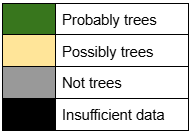

# Repeat process to determine tree likelihood for the baseline year

In [ ]:
list_of_ndvi_images_baseline = get_ndvi_images(available_timestamps_baseline_aug)

In [ ]:
list_of_scl_images_baseline = get_scl_images(available_timestamps_baseline_aug)

In [ ]:
probability_image_baseline = find_trees(YEAR_BASELINE, available_timestamps_baseline_aug, list_of_ndvi_images_baseline, list_of_scl_images_baseline)

In [ ]:
plt.imsave('probability_image_baseline.png', probability_image_comparison)

In [ ]:
list_of_ndvi_images_baseline = get_ndvi_images(available_timestamps_baseline_winter)

In [ ]:
list_of_scl_images_baseline = get_scl_images(available_timestamps_baseline_winter)

In [ ]:
probability_image_baseline = discount_agriculture_etc(YEAR_BASELINE, available_timestamps_baseline_winter, list_of_ndvi_images_baseline, list_of_scl_images_baseline, probability_image_baseline)

In [ ]:
html_content = create_html(probability_image_baseline, f"Probability of Trees {YEAR_BASELINE}")
display(HTML(html_content))

# Compare the two images and create a new one for the deltas

In [ ]:
# Create a new empty image for recording the deltas
probability_image_deltas = np.zeros(image_shape, dtype=image_dtype)

In [ ]:
for i in range(vertical_pixels): # For each pixel down
    for j in range(horizontal_pixels): # For each pixel across
        # if neither year has sufficient data
        if np.array_equal(probability_image_baseline[i,j], COLOUR_INSUFFICIENT_DATA) or np.array_equal(probability_image_comparison[i,j], COLOUR_INSUFFICIENT_DATA):
            probability_image_deltas[i,j]=COLOUR_INSUFFICIENT_DATA
        # if either the baseline year or the comparison year are trees
        elif np.array_equal(probability_image_baseline[i,j], COLOUR_PROBABLE) or np.array_equal(probability_image_comparison[i,j], COLOUR_PROBABLE):
            # if both are trees then set delta pixel to dark green
            if np.array_equal(probability_image_baseline[i,j], COLOUR_PROBABLE) and np.array_equal(probability_image_comparison[i,j], COLOUR_PROBABLE):
                probability_image_deltas[i,j]=COLOUR_PROBABLE
            # else if the baseline is unknown and the comparison is trees then set the delta pixel to light green
            elif np.array_equal(probability_image_baseline[i,j], COLOUR_UNLIKELY) and np.array_equal(probability_image_comparison[i,j], COLOUR_PROBABLE):
                probability_image_deltas[i,j]=COLOUR_NEW
            # else if the baseline was trees and the comparison is unknown then set the delta pixel to red
            elif np.array_equal(probability_image_baseline[i,j], COLOUR_PROBABLE) and np.array_equal(probability_image_comparison[i,j], COLOUR_UNLIKELY):
                probability_image_deltas[i,j]=COLOUR_LOST
            # else if one is trees and one is potential trees then set pixel to yellow
            elif np.array_equal(probability_image_baseline[i,j], COLOUR_POSSIBLE) or np.array_equal(probability_image_comparison[i,j], COLOUR_POSSIBLE):
                probability_image_deltas[i,j]=COLOUR_POSSIBLE
        # else if either of the baseline year or the comparison year are potential trees
        elif np.array_equal(probability_image_baseline[i,j], COLOUR_POSSIBLE) or np.array_equal(probability_image_comparison[i,j], COLOUR_POSSIBLE):
            probability_image_deltas[i,j]=COLOUR_POSSIBLE
        else:
            probability_image_deltas[i,j]=COLOUR_UNLIKELY

In [ ]:
html_content = create_html(probability_image_deltas, f"Probability of Trees {YEAR_BASELINE} to {YEAR_COMPARISON}")
display(HTML(html_content))

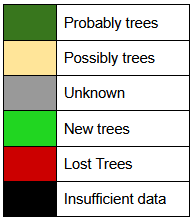

In [ ]:
today = date.today()
now = datetime.now() # Get current date and time
filename = f"probability_map_comparison_{today.strftime('%Y-%m-%d')}_{now.strftime('%H-%M')}.html" # Include hour and minute

with open(filename, "w") as f:
    f.write(html_content)

print(f"HTML content saved to {filename}")

In [ ]:
if DEBUGGING:
    available_timestamps_comparison = get_timestamps((str(YEAR_COMPARISON) + "-01-01", str(YEAR_COMPARISON) + "-12-31"))
    list_of_ndvi_images_comparison = get_ndvi_images(available_timestamps_comparison)
    list_of_scl_images_comparison = get_scl_images(available_timestamps_comparison)
    probability_image_comparison = find_trees(YEAR_COMPARISON, available_timestamps_comparison, list_of_ndvi_images_comparison, list_of_scl_images_comparison)

In [ ]:
if DEBUGGING:
    available_timestamps_baseline = get_timestamps((str(YEAR_BASELINE) + "-01-01", str(YEAR_BASELINE) + "-12-31"))
    list_of_ndvi_images_baseline = get_ndvi_images(available_timestamps_baseline)
    list_of_scl_images_baseline = get_scl_images(available_timestamps_baseline)
    probability_image_baseline = find_trees(YEAR_BASELINE, available_timestamps_baseline, list_of_ndvi_images_baseline, list_of_scl_images_baseline)